<a href="https://colab.research.google.com/github/qazalkz/Python-Projects-for-Beginners-/blob/master/nhanes2015-2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

from google.colab import files 
  
  
uploaded = files.upload()

Saving NHANES.csv to NHANES.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
da= pd.read_csv('NHANES.csv')

In [5]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [6]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

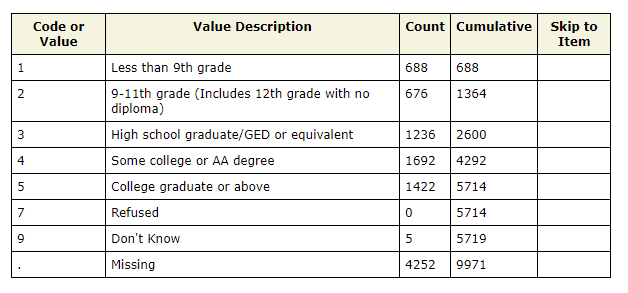

---



In [7]:
da.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [11]:
print(da.DMDEDUC2.value_counts().sum())
print(da.shape)

5474
(5735, 28)


In [10]:
pd.isnull(da.DMDEDUC2).sum()   #تابع نول میزان میسینگ ولیو رو میگه   Detect missing values for an array

261

In some cases it is useful to replace integer codes with a text label that reflects the code's meaning. Below we create a new variable called 'DMDEDUC2x' that is recoded with text labels, then we generate its frequency distribution

In [66]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College",
                                       7: "Refused", 9: "Don't know"})
da.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [67]:
da['DMDEDUC2x']=da.DMDEDUC2.replace({1: '1=<9', 2: '2=9-11', 3:"3=Highschool", 4:'4=colage/aa', 5:'5=collage', 
                                       7:'7=refused', 9: '9=dont know'})
da.DMDEDUC2x.value_counts()

4=colage/aa     1621
5=collage       1366
3=Highschool    1186
1=<9             655
2=9-11           643
9=dont know        3
Name: DMDEDUC2x, dtype: int64

We will also want to have a relabeled version of the gender variable, so we will construct that now as well. We will follow a convention here of appending an 'x' to the end of a categorical variable's name when it has been recoded from numeric to string (text) values.
میخوایم متغیر جنسیت رو مرد و زن تبدیل کنیم چون در جدول با عدد نشون داده

In [61]:
da['RIAGENDRx']=da.RIAGENDR.replace({1:'Male' , 2: 'Female'})
da.RIAGENDRx.value_counts()

Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64

اینجا فراوانی نسبی هم گروه رو بدست میاریم

In [68]:
x= da.DMDEDUC2x.value_counts()
x/x.sum()

4=colage/aa     0.296127
5=collage       0.249543
3=Highschool    0.216661
1=<9            0.119657
2=9-11          0.117464
9=dont know     0.000548
Name: DMDEDUC2x, dtype: float64

In [62]:
gh=da.RIAGENDRx.value_counts()
gh/gh.sum()

Female    0.518919
Male      0.481081
Name: RIAGENDRx, dtype: float64

حالا چون میسینگ ولیو نسون داده نمیشد  میایم میسینگ ولیو رو هم تعرف میکنیم و مجددا از سطح تحصیلات فراوانی نسبی میگریم برای این کاز از فیلنا کمک میگیری که جاهای خالی رو پر میکنه 
fillna() can “fill in” NA values with non-NA data in a couple of ways

In [69]:
da['DMDEDUC2x']=da.DMDEDUC2x.fillna('10=missing')
da.DMDEDUC2x.value_counts()

4=colage/aa     1621
5=collage       1366
3=Highschool    1186
1=<9             655
2=9-11           643
10=missing       261
9=dont know        3
Name: DMDEDUC2x, dtype: int64

In [70]:
print(da.DMDEDUC2x.value_counts().sum())
print(da.shape)

5735
(5735, 31)


In [71]:
x=da.DMDEDUC2x.value_counts()
x/x.sum()

4=colage/aa     0.282650
5=collage       0.238187
3=Highschool    0.206800
1=<9            0.114211
2=9-11          0.112119
10=missing      0.045510
9=dont know     0.000523
Name: DMDEDUC2x, dtype: float64

همانند بسیاری از نظرسنجی ها ، برخی از مقادیر داده ها از بین رفته اند ، بنابراین ما صریحاً موارد گمشده را با استفاده از روش دراپ ان ای قبل از تولید خلاصه سازی رها می کنیم
برای این  کار ما از ایتم بی ام آی یا همون قد و وزن استاندارد افراد استفاده میکنیم چون داده هاش کمی هستند

In [27]:
da.BMXWT.dropna().describe()


count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [29]:
x = da.BMXWT.dropna()  # Extract all non-missing values of BMXWT into a variable called 'x'
print(x.mean()) # Pandas method
print(np.mean(x)) # Numpy function

print(x.median())
print(np.percentile(x, 50))  # 50th percentile, same as the median
print(np.percentile(x, 75))  # 75th percentile
print(x.quantile(0.75)) # Pandas method for quantiles, equivalent to 75th percentile

81.34267560889509
81.34267560889509
78.2
78.2
92.7
92.7


In [31]:
x=da.BMXWT.dropna()
#PANDAS
print('BY PANDAS')
print(x.mean())
print(x.median())
print(x.quantile(0.25))
print(x.quantile(0.50))
print(x.quantile(0.75))
#NUMPY
print('by NUMPY')
print(np.mean(x))
print(np.median(x))
print(np.percentile(x, 25))
print(np.percentile(x, 50))
print(np.percentile(x , 75))


BY PANDAS
81.34267560889509
78.2
65.9
78.2
92.7
by NUMPY
81.34267560889509
78.2
65.9
78.2
92.7


اگر بخوایم برای کا مقادیر کوانت و کمی مون شاخص های اماری بگیریم میشه با کد زیر که دیسکرایب رو برای کل داده استفاده کرده

In [32]:
da.describe()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
count,5735.000000,5208.000000,1731.000000,3379.000000,5735.000000,5735.000000,5735.000000,5735.000000,5734.000000,5474.000000,5474.000000,5735.000000,5735.000000,5735.000000,5735.000000,5134.000000,5401.000000,5401.000000,5535.000000,5535.000000,5666.000000,5673.000000,5662.000000,5345.000000,5427.000000,5427.000000,5368.000000,4732.000000
mean,88678.583435,1.336406,1.587522,3.911512,1.607149,1.518919,48.052310,3.042371,1.185385,3.441725,2.628608,3.323801,40312.412352,1.487881,126.236617,2.403204,125.084614,69.516386,124.783017,69.346703,81.342676,166.142834,29.382197,38.576782,37.146987,33.112235,99.567213,1.915469
std,2882.139237,0.505514,0.623940,34.341839,0.571975,0.499686,18.431011,1.296793,0.491678,1.309700,2.366786,1.724670,38768.921774,0.499897,4.244406,1.601995,18.480873,12.881575,18.527012,13.022829,21.764409,10.079264,7.095921,3.873018,2.800784,5.268027,16.844109,0.414845
min,83732.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5330.960000,1.000000,119.000000,0.000000,82.000000,0.000000,84.000000,0.000000,32.400000,129.700000,14.500000,26.000000,28.200000,17.100000,58.700000,1.000000
25%,86164.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,2.000000,1.000000,3.000000,1.000000,2.000000,17164.085000,1.000000,123.000000,1.060000,112.000000,62.000000,112.000000,62.000000,65.900000,158.700000,24.300000,36.000000,35.200000,29.500000,87.600000,2.000000
50%,88668.000000,1.000000,2.000000,2.000000,2.000000,2.000000,48.000000,3.000000,1.000000,4.000000,1.000000,3.000000,24654.860000,1.000000,126.000000,1.980000,122.000000,70.000000,122.000000,70.000000,78.200000,166.000000,28.300000,38.600000,37.100000,32.700000,98.300000,2.000000
75%,91178.500000,2.000000,2.000000,3.000000,2.000000,2.000000,63.000000,4.000000,1.000000,4.750000,5.000000,5.000000,42862.305000,2.000000,130.000000,3.740000,134.000000,78.000000,134.000000,78.000000,92.700000,173.500000,33.000000,41.200000,39.000000,36.200000,109.300000,2.000000
max,93702.000000,9.000000,9.000000,999.000000,9.000000,2.000000,80.000000,5.000000,9.000000,9.000000,77.000000,7.000000,233755.840000,2.000000,133.000000,5.000000,236.000000,120.000000,238.000000,144.000000,198.900000,202.700000,67.300000,51.500000,47.400000,58.400000,171.600000,9.000000


Next we look at frequencies for a systolic blood pressure measurement (BPXSY1). "BPX" here is the NHANES prefix for blood pressure measurements, "SY" stands for "systolic" blood pressure (blood pressure at the peak of a heartbeat cycle), and "1" indicates that this is the first of three systolic blood presure measurements taken on a subject.

A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic blood pressure is between 80 and 89. Considering only the systolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension.
اگر فشار خون بین 120 و 139 باشه برای نوع سیستولیک فرد با فشار خون بالاست برای حالت دیاستولیک اگر بین 80 تا89 باشه یعنی فشار خون فرد بالاست.

In [13]:
np.mean((da.BPXSY1 >=120) & (da.BPXSY2 <=139))

0.3741935483870968

Next we calculate the propotion of NHANES subjects who are pre-hypertensive based on diastolic blood pressure.

In [17]:
np.mean((da.BPXDI1 >=80) & (da.BPXDI2 <=89))

0.14803836094158676

In [20]:
a=(da.BPXSY1 >=120) & (da.BPXSY2 <=139)
b=(da.BPXDI1 >=80) & (da.BPXDI2 <=89)
print(np.mean(a|b)) # | means or

0.43975588491717527


Blood pressure measurements are affected by a phenomenon called "white coat anxiety", in which a subject's bood pressure may be slightly elevated if they are nervous when interacting with health care providers. Typically this effect subsides if the blood pressure is measured several times in sequence. In NHANES, both systolic and diastolic blood pressure are meausred three times for each subject (e.g. BPXSY2 is the second measurement of systolic blood pressure). We can calculate the extent to which white coat anxiety is present in the NHANES data by looking a the mean difference between the first two systolic or diastolic blood pressure measurements.

In [22]:
print(np.mean(da.BPXSY1 - da.BPXSY2))
print(np.mean(da.BPXDI1 - da.BPXDI2))


0.6749860309182343
0.3490407897187558


Quantitative variables can be effectively summarized graphically. Below we see the distribution of body weight (in Kg), shown as a histogram. It is evidently right-skewed.

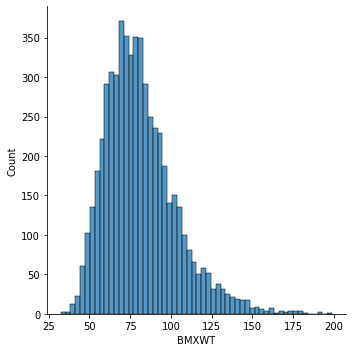

In [25]:
sns.displot(da.BMXWT.dropna())

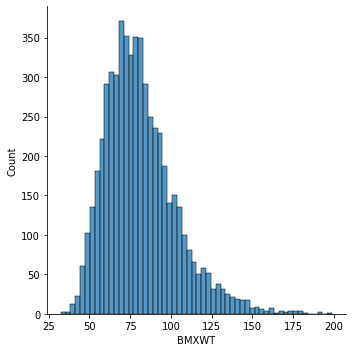

In [29]:
sns.displot(da['BMXWT'] , kde=False )

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: ignored

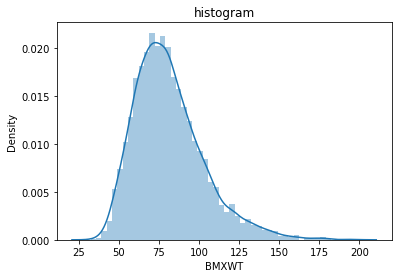

In [45]:
sns.distplot(da['BMXWT'] , kde=True ).set_title('histogram') 
plot.show()

Next we look at the histogram of systolic blood pressure measurements. You can see that there is a tendency for the measurements to be rounded to the nearest 5 or 10 units

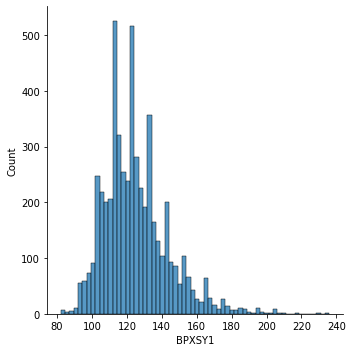

In [43]:
sns.distplot(da.BPXSY1.dropna())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


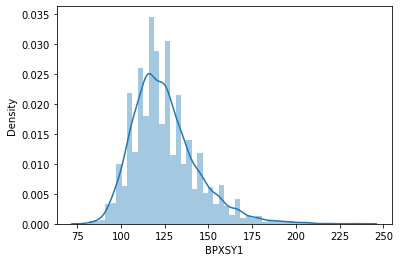

In [42]:
sns.distplot(da.BPXSY1.dropna())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


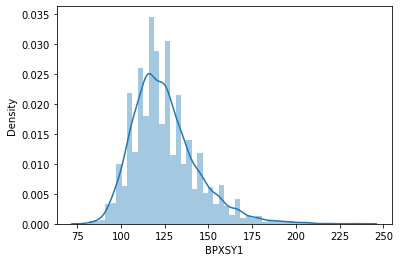

In [44]:
sns.distplot(da['BPXSY1'] , kde=True)

To compare several distributions, we can use side-by-side boxplots. Below we compare the distributions of the first and second systolic blood pressure measurements (BPXSY1, BPXSY2), and the first and second diastolic blood pressure measurements (BPXDI1, BPXDI2). As expected, diastolic measurements are substantially lower than systolic measurements. Above we saw that the second blood pressure reading on a subject tended on average to be slightly lower than the first measurement. This difference was less than 1 mm/Hg, so is not visible in the "marginal" distributions shown below.

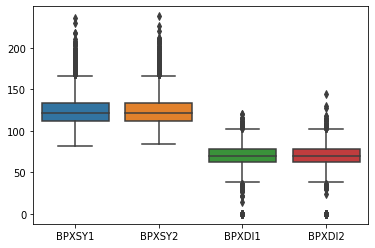

In [48]:
bp=sns.boxplot(data=da.loc[: , ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])


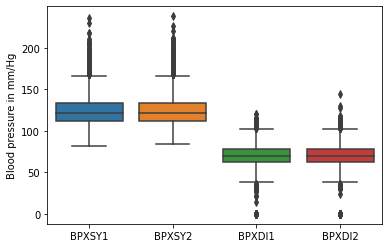

In [49]:
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])
_ = bp.set_ylabel("Blood pressure in mm/Hg")

مقایسه فشار خون و سن افراد

In [ ]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.boxplot(x="agegrp", y="BPXSY1", data=da)  # Make boxplot of BPXSY1 stratified by age group

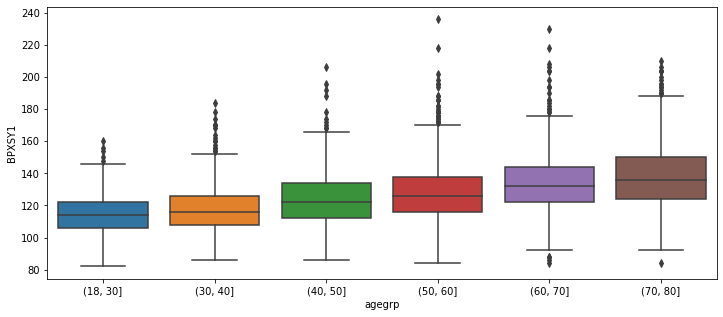

In [53]:
da['agegrp'] = pd.cut(da.RIDAGEYR,  [18,30,40,50,60,70,80])
# da ['esme mehvar x] = az pd. tabe cut (toye da. az sotun RIDAGEYR ke sen hast , [in rade haye seni])
plt.figure(figsize=(12, 5))

sns.boxplot( x= 'agegrp' , y= 'BPXSY1', data=da)

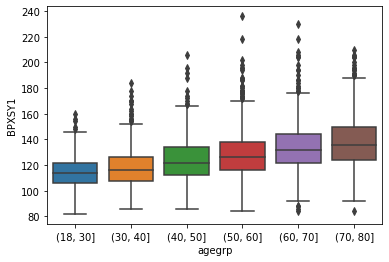

In [59]:
da['agegrp'] = pd.cut(da.RIDAGEYR,  [18,30,40,50,60,70,80])
# da ['esme mehvar x] = az pd. tabe cut (toye da. az sotun RIDAGEYR ke sen hast , [in rade haye seni])
#plt.figure(figsize=(12, 10))
sns.boxplot( x= 'agegrp' , y= 'BPXSY1', data=da)

Taking this a step further, it is also the case that blood pressure tends to differ between women and men. While we could simply make two side-by-side boxplots to illustrate this contrast, it would be a bit odd to ignore age after already having established that it is strongly associated with blood pressure. Therefore, we will doubly stratify the data by gender and age.

We see from the figure below that within each gender, older people tend to have higher blood pressure than younger people. However within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- in younger people, men have substantially higher blood pressures than women of the same age. However for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. It is also notable that the variation of these distributions, reflected in the height of each box in the boxplot, increases with age.
تفکیک همون جدول بر اساس مرد و زن...فشار خون و سن

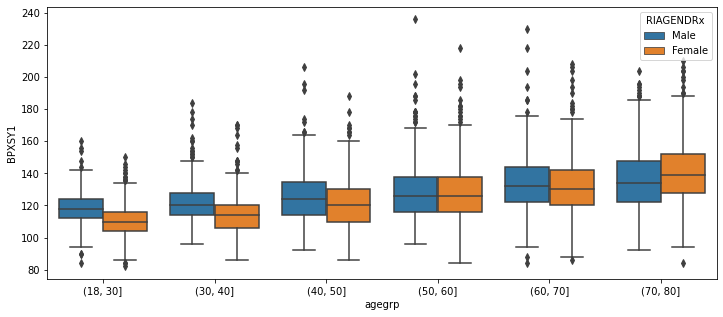

In [63]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="agegrp", y="BPXSY1", hue="RIAGENDRx", data=da)

When stratifying on two factors (here age and gender), we can group the boxes first by age, and within age bands by gender, as above, or we can do the opposite -- group first by gender, and then within gender group by age bands. Each approach highlights a different aspect of the data.
باکس بندی دو گروه مجزا گروه 1 جنسیت و گروه 2 سن

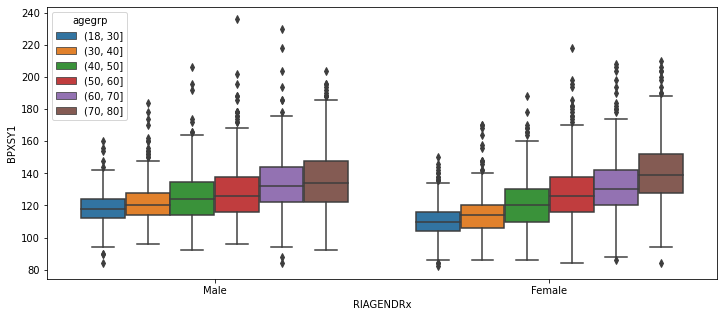

In [64]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="RIAGENDRx", y="BPXSY1", hue="agegrp", data=da)

رابطه سن و تحصیلات 

In [72]:
da.groupby("agegrp")["DMDEDUC2x"].value_counts()

agegrp    DMDEDUC2x   
(18, 30]  4=colage/aa     364
          5=collage       278
          3=Highschool    237
          10=missing      128
          2=9-11           99
          1=<9             47
(30, 40]  4=colage/aa     282
          5=collage       264
          3=Highschool    182
          2=9-11          111
          1=<9             93
(40, 50]  4=colage/aa     262
          5=collage       260
          3=Highschool    171
          2=9-11          112
          1=<9             98
(50, 60]  4=colage/aa     258
          3=Highschool    220
          5=collage       220
          2=9-11          122
          1=<9            104
(60, 70]  4=colage/aa     238
          3=Highschool    192
          5=collage       188
          1=<9            149
          2=9-11          111
(70, 80]  4=colage/aa     217
          3=Highschool    184
          1=<9            164
          5=collage       156
          2=9-11           88
          9=dont know       3
Name: DMDEDUC2x, 

We can also stratify jointly by age and gender to explore how educational attainment varies by both of these factors simultaneously. In doing this, it is easier to interpret the results if we pivot the education levels into the columns, and normalize the counts so that they sum to 1. After doing this, the results can be interpreted as proportions or probabilities. One notable observation from this table is that for people up to age around 60, women are more likely to have graduated from college than men, but for people over aged 60, this relationship reverses.

دسته بندی تحصیلات بر اساس سن به تفکیک زن و مرد

In [76]:
dx = da.loc[~da.DMDEDUC2x.isin(["Don't know", "Missing"]), :]  # Eliminate rare/missing values
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"]
dx = dx.value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide'
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

DMDEDUC2x           10=missing  1=<9  2=9-11  3=Highschool  4=colage/aa  5=collage  9=dont know
agegrp   RIAGENDRx                                                                             
(18, 30] Female          0.092 0.044   0.072         0.195        0.340      0.256          NaN
         Male            0.132 0.037   0.101         0.217        0.289      0.224          NaN
(30, 40] Female            NaN 0.097   0.089         0.165        0.335      0.314          NaN
         Male              NaN 0.103   0.151         0.227        0.269      0.251          NaN
(40, 50] Female            NaN 0.106   0.110         0.173        0.313      0.299          NaN
         Male              NaN 0.112   0.142         0.209        0.262      0.274          NaN
(50, 60] Female            NaN 0.102   0.117         0.234        0.302      0.245          NaN
         Male              NaN 0.123   0.148         0.242        0.256      0.231          NaN
(60, 70] Female            NaN 0.188   0